## Iris dataset Neural Networks / Manuel Ibañez

In [15]:
import warnings
warnings.simplefilter("ignore")

import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import datasets



## Neural Network 

In [16]:
from sklearn.model_selection import train_test_split

# Load iris dataset and create DataFrame
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

y = df['species']
x = df.drop(columns='species')

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
NN = MLPClassifier(hidden_layer_sizes=5, max_iter=50,activation='relu', learning_rate='constant', learning_rate_init=0.04)
NN.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=5, learning_rate_init=0.04, max_iter=50)

### Evaluate models

In [18]:
Y_pred = NN.predict(X_test)
metrics.accuracy_score(y_test, Y_pred)

0.9666666666666667

Text(50.722222222222214, 0.5, 'Actual')

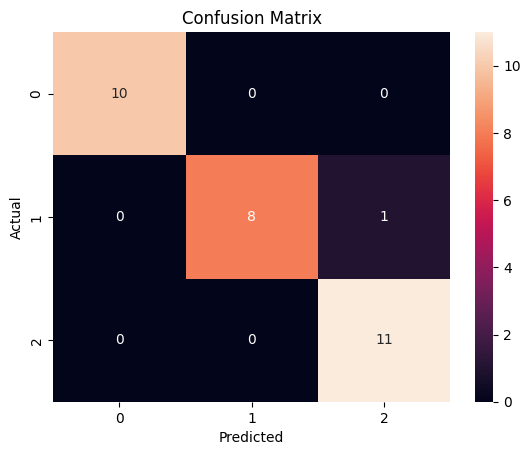

In [19]:
sns.heatmap(metrics.confusion_matrix(y_test, Y_pred), annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

### Hyperparameter tuning

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(50,), (75,), (100,)],
    'activation': ['relu', 'tanh'],
    'learning_rate': ['constant', 'adaptive'],
    'alpha': [0.0001, 0.001, 0.01]
}

In [21]:
best_model = GridSearchCV(estimator=NN, param_grid=param_grid, n_jobs=-1)
best_model.fit(X_train, y_train)

GridSearchCV(estimator=MLPClassifier(hidden_layer_sizes=5,
                                     learning_rate_init=0.04, max_iter=50),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(50,), (75,), (100,)],
                         'learning_rate': ['constant', 'adaptive']})

In [22]:
best_model.best_params_

{'activation': 'tanh',
 'alpha': 0.001,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'adaptive'}

In [23]:
Y_pred =  best_model.predict(X_test)
metrics.accuracy_score(y_test, Y_pred)

1.0